In [14]:
import os
import shutil

In [15]:
TRAIN_PATH = '/home/pratik/jupyternotebook_programs/plant_disease_detection/dataset/train/'
VAL_PATH = '/home/pratik/jupyternotebook_programs/plant_disease_detection/dataset/valid/'

img_width = 224
img_height = 224

In [16]:
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras import Sequential
from tensorflow.keras import layers
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from PIL import Image, ImageFont, ImageDraw
import random

In [17]:
input_layer = Input(shape=(img_width, img_height,3), name='base_input')
x = layers.Conv2D(32, 3, activation="relu")(input_layer)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(activation = 'softmax', units = 38)(x)


In [18]:
model = Model(input_layer, outputs, name="toy_resnet")
model.summary()

Model: "toy_resnet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
base_input (InputLayer)         [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_14 (Conv2D)              (None, 222, 222, 32) 896         base_input[0][0]                 
__________________________________________________________________________________________________
conv2d_15 (Conv2D)              (None, 220, 220, 64) 18496       conv2d_14[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_5 (MaxPooling2D)  (None, 73, 73, 64)   0           conv2d_15[0][0]                  
_________________________________________________________________________________________

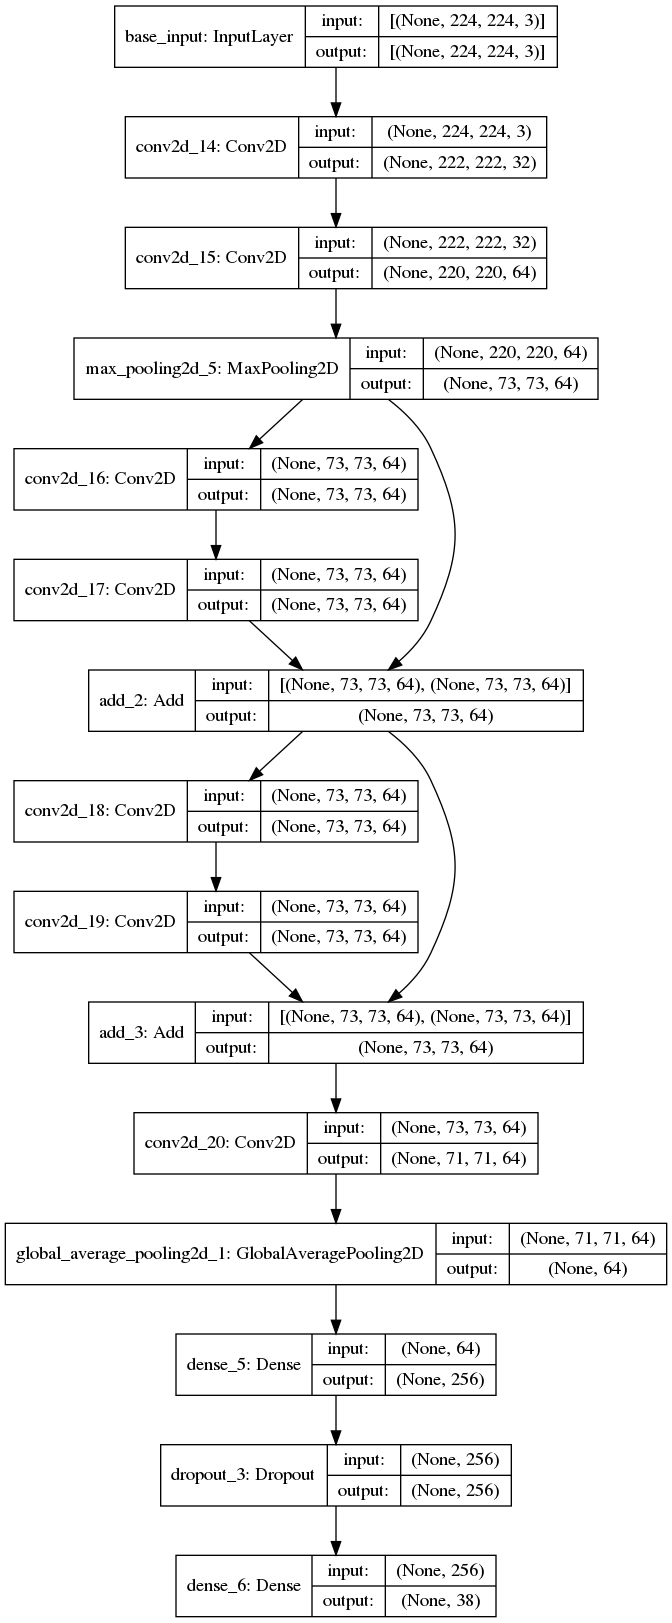

In [19]:
from tensorflow.python.keras.utils.vis_utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True, to_file='outer-model.png')

In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])


In [21]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 128)     3584      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 128)     0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 109, 109, 128)     147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 52, 52, 128)       147584    
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 50, 50, 64)        73792     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 48, 48, 64)        3

In [22]:
train_datagen = image.ImageDataGenerator(
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,

)


test_datagen = image.ImageDataGenerator(rescale=1.255)



In [23]:
train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(img_width,img_height),
    batch_size = 32,
    class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(

    VAL_PATH,
    target_size=(img_width,img_height),
    batch_size = 32,
    class_mode = 'categorical'

)


Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [24]:
hist = cnn.fit_generator(
train_generator,
    steps_per_epoch=2196,
    epochs = 40,
    validation_data = validation_generator,
    validation_steps = 4
)

Epoch 1/40
  21/2196 [..............................] - ETA: 2:43:48 - loss: 3.6535 - acc: 0.0432

KeyboardInterrupt: 

2
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)


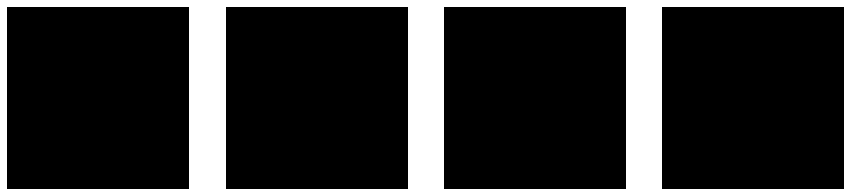

In [33]:
print(len(train_generator[0]))

# plotting images
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15,15))

for i in range(4):
    # convert to unsigned integers for plotting
    image = next(train_generator)[0][0].astype('uint8')    
    # changing size from (1, 200, 200, 3) to (200, 200, 3) for plotting the image
    image = np.squeeze(image)
    print(image.shape)

    #plot raw pixel data
    ax[i].imshow(image)
    ax[i].axis('off')

In [34]:
hist = model.fit_generator(
train_generator,
    steps_per_epoch=40,
    epochs = 40,
    validation_data = validation_generator,
    validation_steps = 4
)

Epoch 1/40
40/40 [==============================] - 134s 3s/step - loss: 3.6400 - acc: 0.0281 - val_loss: 19.0077 - val_acc: 0.0078
Epoch 2/40
40/40 [==============================] - 126s 3s/step - loss: 3.6373 - acc: 0.0219 - val_loss: 31.0962 - val_acc: 0.0078
Epoch 3/40
40/40 [==============================] - 132s 3s/step - loss: 3.6360 - acc: 0.0391 - val_loss: 23.5864 - val_acc: 0.0000e+00
Epoch 4/40
40/40 [==============================] - 125s 3s/step - loss: 3.5801 - acc: 0.0359 - val_loss: 16.4911 - val_acc: 0.0625
Epoch 5/40
40/40 [==============================] - 127s 3s/step - loss: 3.5542 - acc: 0.0430 - val_loss: 39.8622 - val_acc: 0.0781
Epoch 6/40
40/40 [==============================] - 132s 3s/step - loss: 3.4959 - acc: 0.0578 - val_loss: 259.6455 - val_acc: 0.0078
Epoch 7/40
40/40 [==============================] - 176s 4s/step - loss: 3.4902 - acc: 0.0641 - val_loss: 112.8651 - val_acc: 0.0391
Epoch 8/40
40/40 [==============================] - 182s 5s/step - los

KeyboardInterrupt: 

In [63]:
test_mode = '/home/pratik/jupyternotebook_programs/plant_disease_detection/archive/test/test/'

for i in os.listdir(test_mode):
    img = image.load_img(test_mode+'//'+ i,target_size=(250,250))
    print(i)
    plt.imshow(img)
    plt.show()
    
    x = image.img_to_array(img)
    x = np.expand_dims(x,axis=0)
    images = np.vstack([x])
    val = cnn.predict(images)
    print(val)

ERROR:root:An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 0))



AttributeError: 'numpy.ndarray' object has no attribute 'load_img'

In [ ]:
loss = model.evaluate(train_generator)

y_pred_train = model.predict(train_generator)
train_accuracy = compute_accuracy(tr_y, y_pred_train)

y_pred_test = model.predict([ts_pairs[:,0], ts_pairs[:,1]])
test_accuracy = compute_accuracy(ts_y, y_pred_test)

print("Loss = {}, Train Accuracy = {} Test Accuracy = {}".format(loss, train_accuracy, test_accuracy))